# Chemspace Explorer Initialization

In [1]:
import sys
import os

# Get path to the parent directory containing the package
MAIN_FOLDER = os.path.abspath(os.path.join(os.getcwd(), '../ms_chemical_space_explorer'))
DATA_FOLDER = "data"
PROCESSED_DATA_FOLDER = "processed"
FILENAME = os.path.join(MAIN_FOLDER, DATA_FOLDER, PROCESSED_DATA_FOLDER, "1000_test_spectra.mgf")
PICKLE = "pickle"

print(f"Adding to path: {MAIN_FOLDER}")
sys.path.append(MAIN_FOLDER)

Adding to path: g:\Dokumente\Studium\MMI\Master-Arbeit\Code\ms_chemical_space_explorer


In [2]:
from ms_chemical_space_explorer.chemical_space_explorer import spectra_importer

query_spectra = spectra_importer(FILENAME)

Processing spectra: 100%|██████████| 1000/1000 [00:04<00:00, 241.37it/s]


In [3]:
import pickle
from ms_chemical_space_explorer.chemical_space_explorer import start_workflow

def analogue_search(n: int = 2):
    file = os.path.join(PICKLE, f'results_n={n}.pkl')
    try:
        with open(file, 'rb') as f:
            analogues = pickle.load(f)
            print(f"Loaded analogues from {file}")
    
    except FileNotFoundError:
        explorer = start_workflow(os.path.abspath(os.path.join(MAIN_FOLDER, DATA_FOLDER, PROCESSED_DATA_FOLDER)))
        analogues = explorer.analogue_search(query_spectra, n=n)
        
        with open(file, 'wb') as f:
            pickle.dump(analogues, f)
        print(f"Analogues saved to {file}")
        
    return analogues

#### somethimes this works, sometimes the approach above

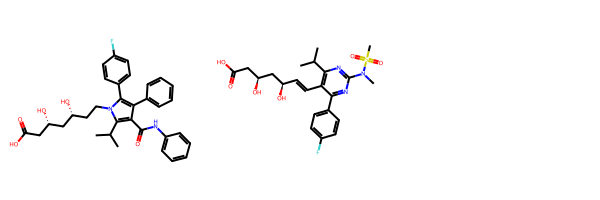

In [4]:
# some unrelated more complex mols 
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

atorvastatin = Chem.MolFromSmiles('O=C(O)C[C@H](O)C[C@H](O)CCn2c(c(c(c2c1ccc(F)cc1)c3ccccc3)C(=O)Nc4ccccc4)C(C)C')
rosuvastatin = Chem.MolFromSmiles('OC(=O)C[C@H](O)C[C@H](O)\C=C\c1c(C(C)C)nc(N(C)S(=O)(=O)C)nc1c2ccc(F)cc2')
MolsToGridImage((atorvastatin,rosuvastatin)) 

# Code

## Load Analogues and import methods

### Load Query Spectra

Examples for a bad matches: QUERY_SPECTRUM_ID = 8

Examples for good matches: 3

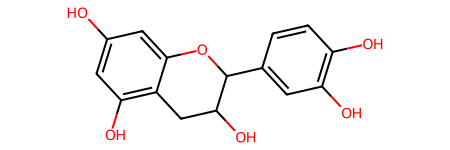

In [233]:
QUERY_SPECTRUM_ID = 3
query_mol = Chem.MolFromSmiles(query_spectra[QUERY_SPECTRUM_ID].metadata["smiles"])
query_mol

### Load Analogues

In [234]:
import pandas as pd

all_analogues = analogue_search(n=6)
all_analogues

Loaded analogues from pickle\results_n=6.pkl


smiles  predicted_distance  \
2949  CCCCC\C=C/C\C=C/CCCCCCCC(=O)OCC(COP(O)(=O)OC1C...            0.037059   
2950  CCCCCCCCCCCCCCCCC(=O)OCC(COP(O)(=O)OC1C(O)C(O)...            0.039129   
2952  CCCCCCCC\C=C/CCCCCCCC(=O)OCC(COP(O)(=O)OC1C(O)...            0.042137   
2951  CCCCCCCCCCCCCCCCCC(=O)OCC(COP(O)(=O)OC1C(O)C(O...            0.040339   
3365  CCCCC/C=C\C/C=C\C/C=C\CCCCCCC(=O)O[C@H](COC(=O...            0.042183   
...                                                 ...                 ...   
426                              COC(=O)C(N)Cc1c[nH]cn1            0.133824   
1267  O=C1NC(C(NC(C(NC(C(NC(C(NC(C(NC(C(NC(C(OC(CCCC...            0.212912   
374                                          NCCCCNCCCN            0.216926   
200                            C1COC(NC(C2CC2)C2CC2)=N1            0.258624   
1268  O=C1CC2C(CCC3(C)C2CC4OC5(OCC(C)CC5)C(C)C43)C6(...            0.222598   

      mean_distance  std_distance       isf  candidate_mean_similarity  \
2949       0.039914      0.005182  0.966980                   0.951327   
2950       0.039914      0.005182  0.966980                   0.951327   
2952       0.039914      0.005182  0.966980                   0.951327   
2951       0.039914      0.005182  0.966980                   0.951327   
3365       0.036931      0.004866  0.964284                   0.947459   
...             ...           ...       ...                        ...   
426        0.190069      0.046234  0.000000                   0.035263   
1267       0.223192      0.011110  0.000000                   0.058077   
374        0.216909      0.055245  0.000000                   0.103315   
200        0.248183      0.024927  0.000000                   0.037818   
1268       0.223192      0.011110  0.000000                   0.058077   

      candidate_std_similarity  precursor_mz_diff   visual_x  visual_y  \
2949                  0.039300           -4.03360  10.855725  2.893498   
2950                  0.039300          -14.02160   6.573919  3.105054   
2952                  0.039300           24.00040   7.536593  1.917021   
2951                  0.039300            2.01060  14.638113 -5.208595   
3365                  0.039397           19.96800   8.401516  1.257386   
...                        ...                ...        ...       ...   
426                   0.170949            0.01083  11.598349  0.518618   
1267                  0.200740          322.24100  12.049074  3.613981   
374                   0.240005            0.04830   4.445515 -1.985668   
200                   0.172040          -17.01531  14.475111  0.972561   
1268                  0.200740          388.04100  11.916512 -1.822585   

            inchikey  query_spectrum_id   ionmode  
2949  IDBHHLONPONREV                176  negative  
2950  NHCUHDJVBAQLLF                176  negative  
2952  CVDYOYNJWLXMAW                176  negative  
2951  GGSSNEAFVQRIHU                176  negative  
3365  DYTUHXQCMCKAHL                245  negative  
...              ...                ...       ...  
426   BXRMEWOQUXOLDH                355  positive  
1267  YZLKGNHBHWKJTJ                496  positive  
374   ATHGHQPFGPMSJY                346  positive  
200   CQXADFVORZEARL                317  positive  
1268  ZLJCBUYEMINKJV                496  positive  

[3597 rows x 13 columns]

In [235]:
from ms_chemical_space_explorer.fragment_extractor import generate_mols_from_spectrum_query

# Pick analogues for a specific spectrum
query_analogues_df = all_analogues[all_analogues["query_spectrum_id"] == QUERY_SPECTRUM_ID]
query_analogues_df

smiles  predicted_distance  \
1911  OC[C@@H]1O[C@@H](Oc2cc(O)c3c(c2)O[C@H](c2ccc(O...            0.063284   
1912  O=C(Oc1cc(O)c2c(c1)O[C@@H](c1ccc(O)c(O)c1)[C@H...            0.146180   
1913     O=C1c2c(O)cc(O)cc2O[C@@H](c2ccc(O)cc2)[C@@H]1O            0.175478   
1914  O=C(C=C1OC)C2=C(C(O)=C(C[C@H](C)OC3=O)C3=C2O)C1=O            0.148662   
1915     CC1=CC(=O)C2=C(O1)C3=C(C=C(C(=C3C(=O)O)O)O)OC2            0.131096   
1916  COc1c2oc3c(O)ccc(O)c3c(=O)c2c(O)cc1O[C@@H]1O[C...            0.161369   

      mean_distance  std_distance       isf  candidate_mean_similarity  \
1911       0.148705      0.032686  0.414637                   0.331926   
1912       0.148705      0.032686  0.409418                   0.331926   
1913       0.148705      0.032686  0.394399                   0.331926   
1914       0.148705      0.032686  0.328444                   0.331926   
1915       0.148705      0.032686  0.322570                   0.331926   
1916       0.148705      0.032686  0.321851                   0.331926   

      candidate_std_similarity  precursor_mz_diff   visual_x  visual_y  \
1911                  0.248898         132.042252  16.150217  0.122576   
1912                  0.248898         152.010941  13.027824  4.610951   
1913                  0.248898          -2.015640  15.912245 -1.916570   
1914                  0.248898          13.978238  17.078829  0.968277   
1915                  0.248898          -0.036362  14.971570  4.345986   
1916                  0.248898         162.016438  17.687640 -0.156083   

            inchikey  query_spectrum_id   ionmode  
1911  JRAAEKBJXQXXBZ                  3  negative  
1912  WKIHBIBUCQPPBY                  3  negative  
1913  PADQINQHPQKXNL                  3  negative  
1914  VZSFONBSZGFZNH                  3  negative  
1915  PKEPGKZPVDAVKI                  3  negative  
1916  YLXVKDCXOBNAQO                  3  negative

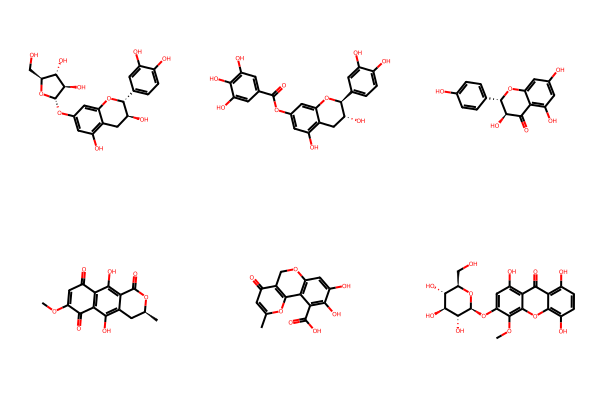

In [236]:
# generate rdkit mols and preapre them for visualization
query_analogues = generate_mols_from_spectrum_query(spectrum_query_result=query_analogues_df)

MolsToGridImage(query_analogues)

## Similarity Maps

In [237]:
# Morgan fingerprint parameters
MORGAN_RADIUS = 9
NBITS = 2048
USE_FEATURES = False
FPTYPE = "bv"           # "bv" or "count"
# SimMap Fragment parameters
SIM_MAP_THESHOLD = 0.2
NORMALIZE_WEIGHTS = True
# visualization in this notebook
FRAGMENTS_PER_ROW = 5

In [238]:
from rdkit.Chem.Draw import SimilarityMaps

def MorganWrapper(mol, atomId, **kwargs):
    return SimilarityMaps.GetMorganFingerprint(mol, atomId, radius=MORGAN_RADIUS, fpType=FPTYPE, nBits=NBITS, useFeatures=USE_FEATURES, **kwargs)

#### Query sim maps:

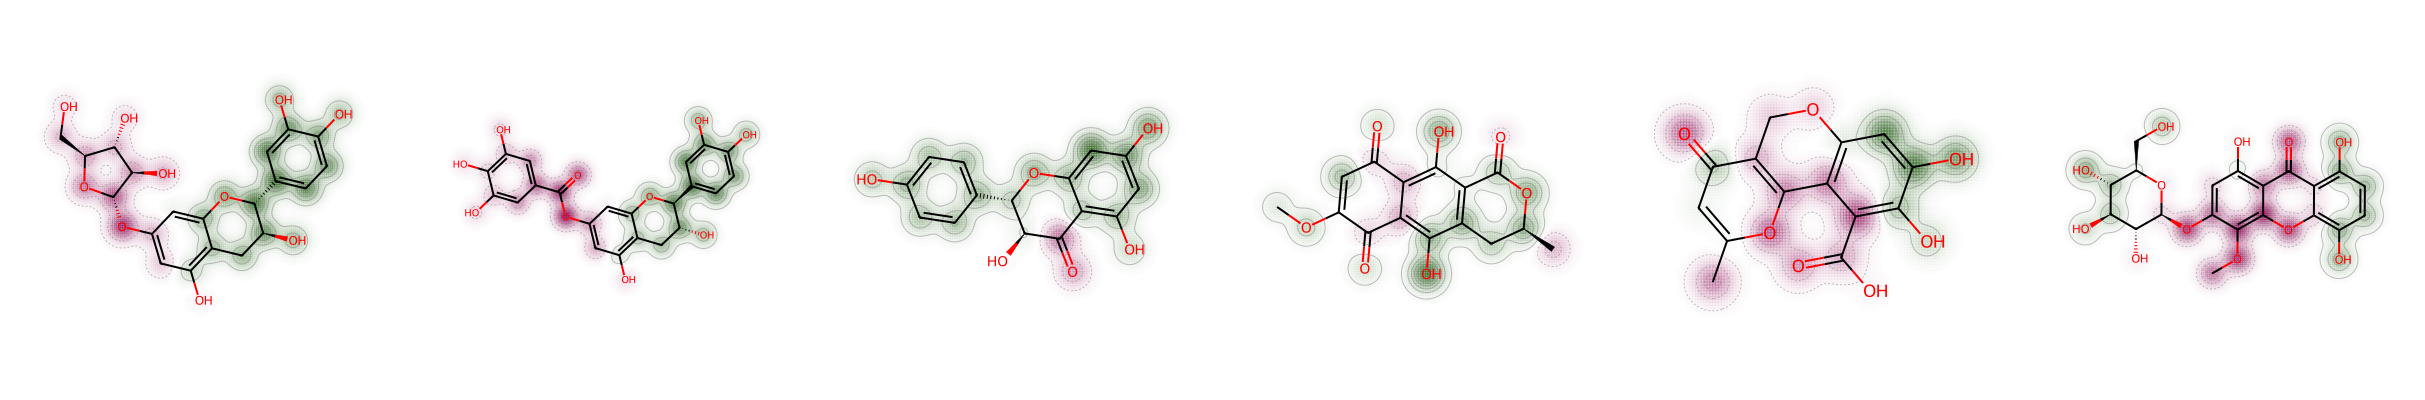

In [239]:
from rdkit.Chem import Draw
from ms_chemical_space_explorer.chemical_space_visualizer import draw_sim_map, draw_images, create_sim_maps, draw_mol

draw2d = Draw.MolDraw2DCairo(400, 400)

query_sim_maps = []
query_weights = []
for analogue in query_analogues:
    query_sim_maps.append(draw_sim_map(draw2d, query_mol, analogue, MorganWrapper, size = (10, 10)))
    weights = SimilarityMaps.GetAtomicWeightsForFingerprint(query_mol, analogue, MorganWrapper)
    if NORMALIZE_WEIGHTS:
        weights, _ = SimilarityMaps.GetStandardizedWeights(weights)
    query_weights.append(weights)

draw_images(query_sim_maps)

In [240]:
def extract_stacked_weights_from_analogues(
    mols: list[Chem.Mol],
    fp_function: callable = SimilarityMaps.GetMorganFingerprint,
    normalize_stacked_weights: bool = True,
) -> list[float]:
    """
    Extracts similar substructures from a list of molecules.

    Args:
        mols (list[Chem.Mol]): List of molecules to extract
        fingerprint_type (function, optional): Fingerprint function to use when comparing molecules. Defaults to SimilarityMaps.GetRDKFingerprint.

    Returns:
        list[float]: 
    """

    stacked_weights = []

    for ref_mol in mols:
        ref_mol_id = ref_mol.GetProp("analogue_id")
        ref_mol_stacked_weights = [0] * ref_mol.GetNumAtoms()
        for probe_mol in mols:
            probe_mol_id = probe_mol.GetProp("analogue_id")
            # Skip if comparing molecule to itself
            if probe_mol_id == ref_mol_id:
                continue

            sim_weights = SimilarityMaps.GetAtomicWeightsForFingerprint(probe_mol, ref_mol, fp_function)
            sim_weights, _ = SimilarityMaps.GetStandardizedWeights(sim_weights)
            
            assert len(sim_weights) == ref_mol.GetNumAtoms(), "Length of sim_weights does not match number of atoms in reference molecule."
            ref_mol_stacked_weights = [ref_mol_stacked_weights[i] + sim_weights[i] for i in range(ref_mol.GetNumAtoms())]
        
        if(normalize_stacked_weights):
            ref_mol_stacked_weights, _ = SimilarityMaps.GetStandardizedWeights(ref_mol_stacked_weights)
        stacked_weights.append(ref_mol_stacked_weights)

    return stacked_weights

In [241]:
from ms_chemical_space_explorer.chemical_space_visualizer import str_to_image, SimMapLegend
from PIL import Image

def draw_sim_map_by_weights(
    draw2d: Draw.MolDraw2D,
    mol: Chem.Mol,
    weigths: list[float],
    size: tuple[int, int] = (50, 50),
    legend: SimMapLegend = None,
) -> Image.Image:
    draw2d = SimilarityMaps.GetSimilarityMapFromWeights(mol, weigths, draw2d=draw2d, size=size)
    draw2d.FinishDrawing()
    img = str_to_image(draw2d.GetDrawingText())

    if legend:
        return legend.draw(img)

    return img

#### Stacked analogue sim maps:

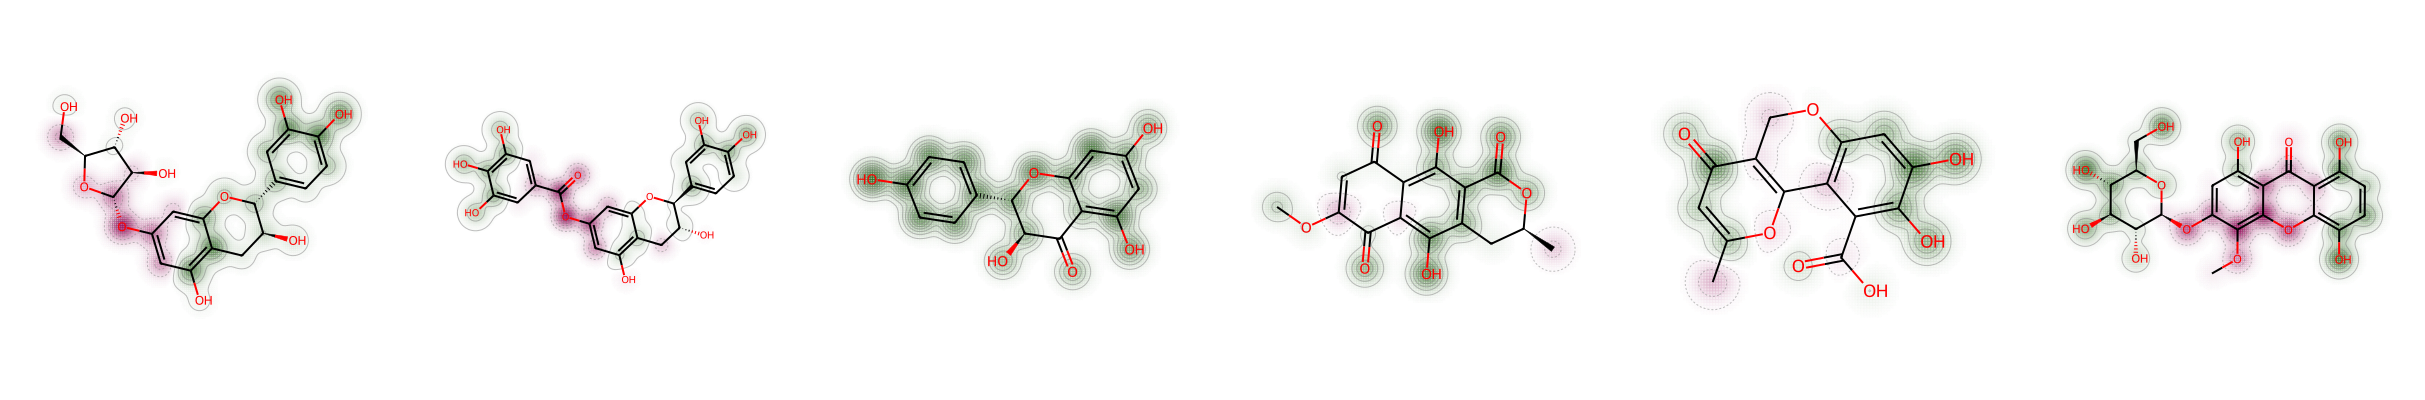

In [242]:
stacked_weights = extract_stacked_weights_from_analogues(query_analogues, fp_function = MorganWrapper, normalize_stacked_weights = NORMALIZE_WEIGHTS)

stacked_sim_maps = []
for i, analogue in enumerate(query_analogues):
    draw2d = Draw.MolDraw2DCairo(400, 400)
    stacked_sim_maps.append(draw_sim_map_by_weights(draw2d, analogue, stacked_weights[i], size = (10, 10)))

draw_images(stacked_sim_maps)

In [243]:
print(f"Average weight differences of analogue sim maps to query sim map")
avg_weight_diffs = []
for i, analogue in enumerate(query_analogues):
    weight_diffs = [abs(stacked_weights[i][j] - query_weights[i][j]) for j in range(len(stacked_weights[i]))]
    avg_weight_diff = sum(weight_diffs) / len(weight_diffs)
    avg_weight_diffs.append(avg_weight_diff)
    print(f"Analogue {analogue.GetProp('analogue_id')}: {avg_weight_diff:.3f}\n atom weight differences = {[f'{w:.3f}' for w in weight_diffs]}")

print(f"\nAvegage weight difference for all analogues = {sum(avg_weight_diffs) / len(avg_weight_diffs):.3f}")

Average weight differences of analogue sim maps to query sim map
Analogue 3.0: 0.317
 atom weight differences = ['0.247', '0.121', '0.447', '0.252', '0.133', '0.072', '0.266', '0.224', '0.504', '0.135', '0.381', '0.019', '0.309', '0.285', '0.559', '0.544', '0.731', '0.317', '0.234', '0.332', '0.059', '0.246', '0.490', '0.514', '0.318', '0.421', '0.273', '0.386', '0.429', '0.254']
Analogue 3.1: 0.394
 atom weight differences = ['0.167', '0.000', '0.000', '0.291', '0.116', '0.055', '0.080', '0.087', '0.360', '0.283', '0.561', '0.840', '0.498', '0.806', '0.491', '0.128', '0.112', '0.274', '0.122', '0.710', '0.599', '0.444', '0.690', '0.276', '0.386', '0.792', '0.538', '0.663', '0.526', '0.792', '0.538', '0.386']
Analogue 3.2: 0.334
 atom weight differences = ['0.889', '0.636', '0.063', '0.438', '0.380', '0.153', '0.192', '0.152', '0.075', '0.114', '0.278', '0.303', '0.245', '0.246', '0.348', '0.390', '0.621', '0.348', '0.246', '0.418', '0.471']
Analogue 3.3: 0.325
 atom weight differences

#### All analogue sim maps:

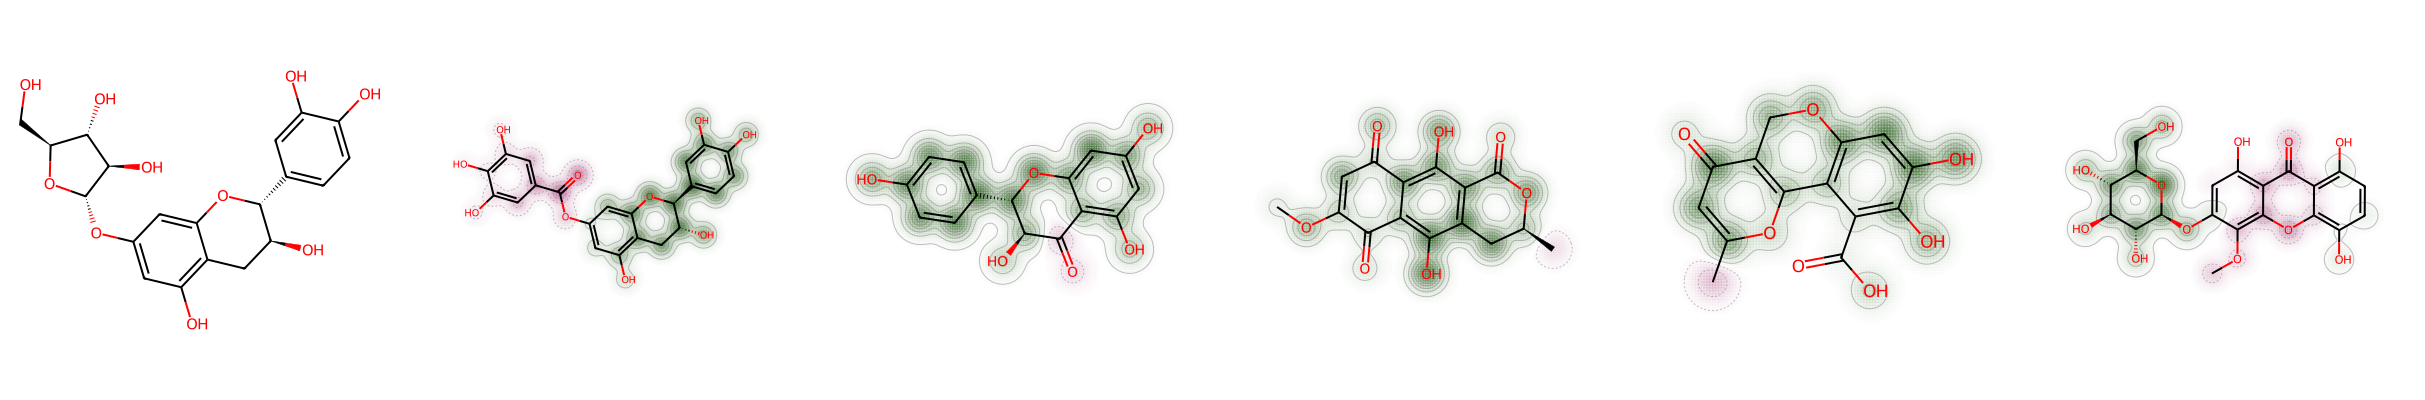

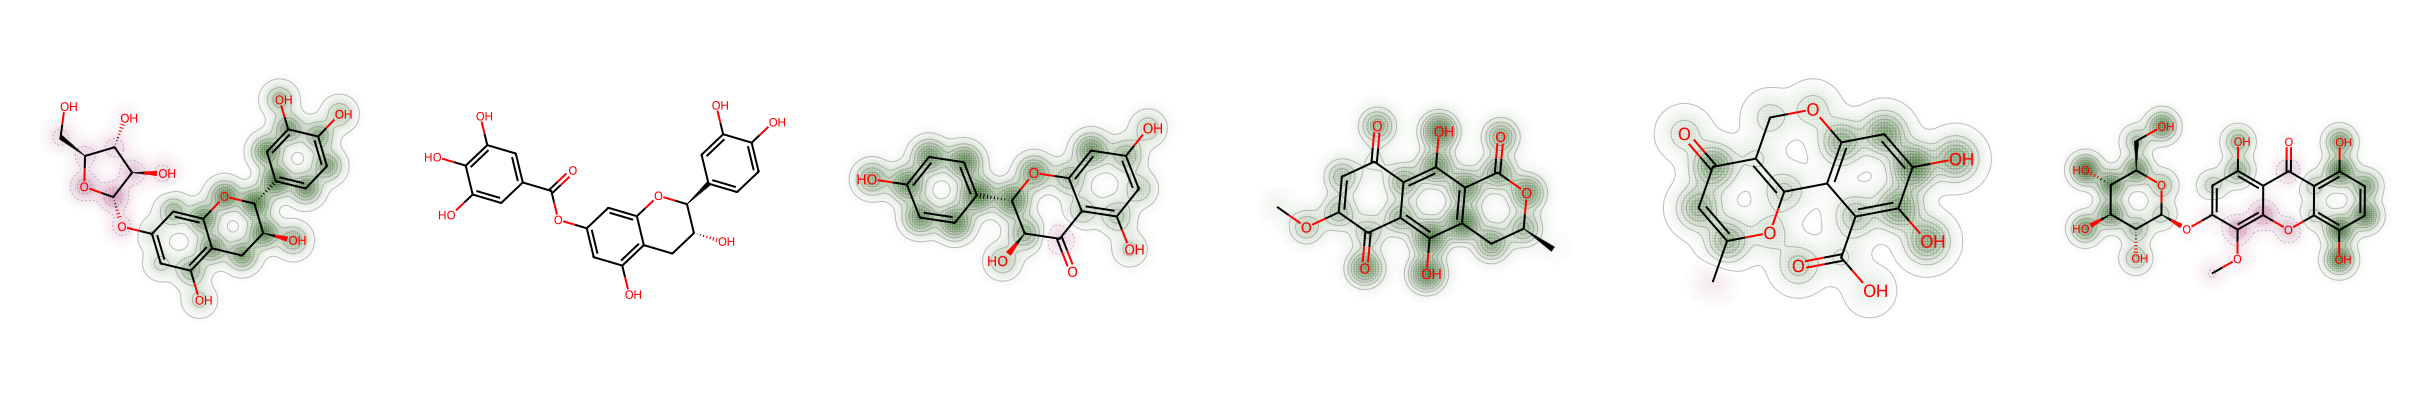

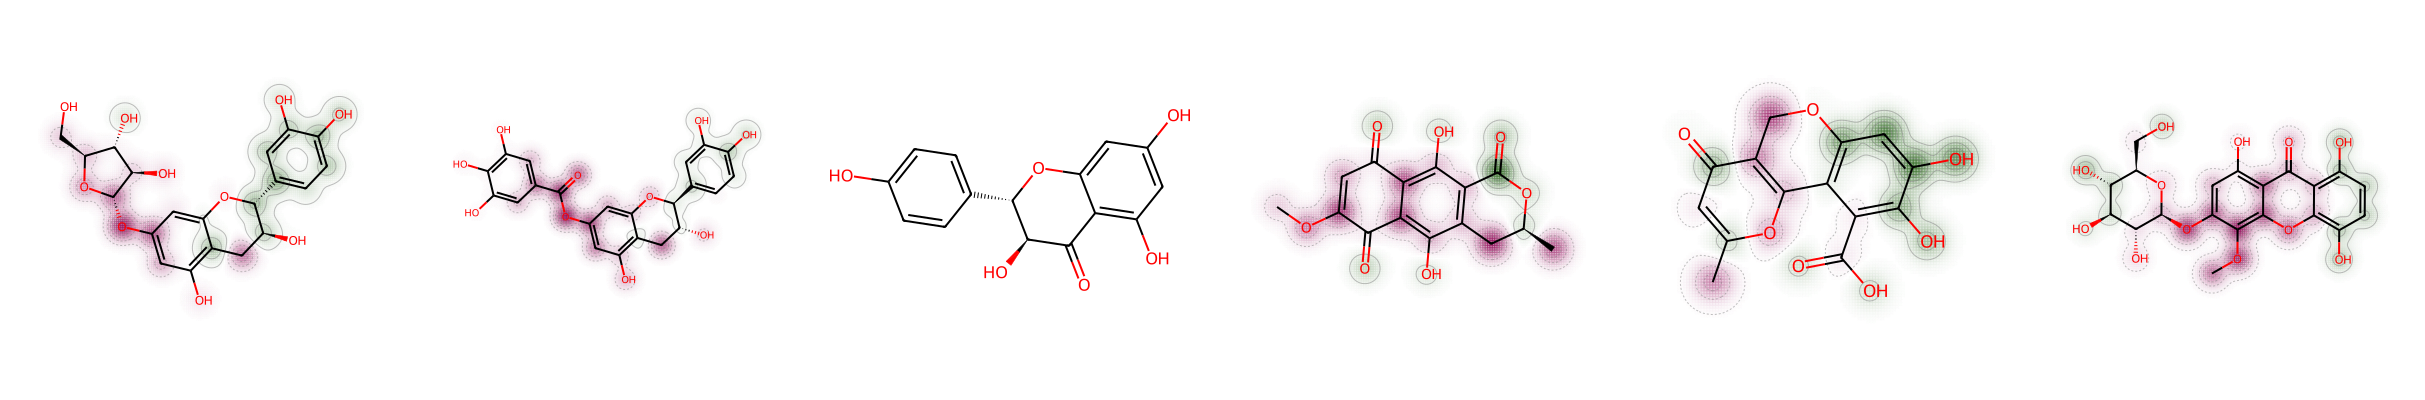

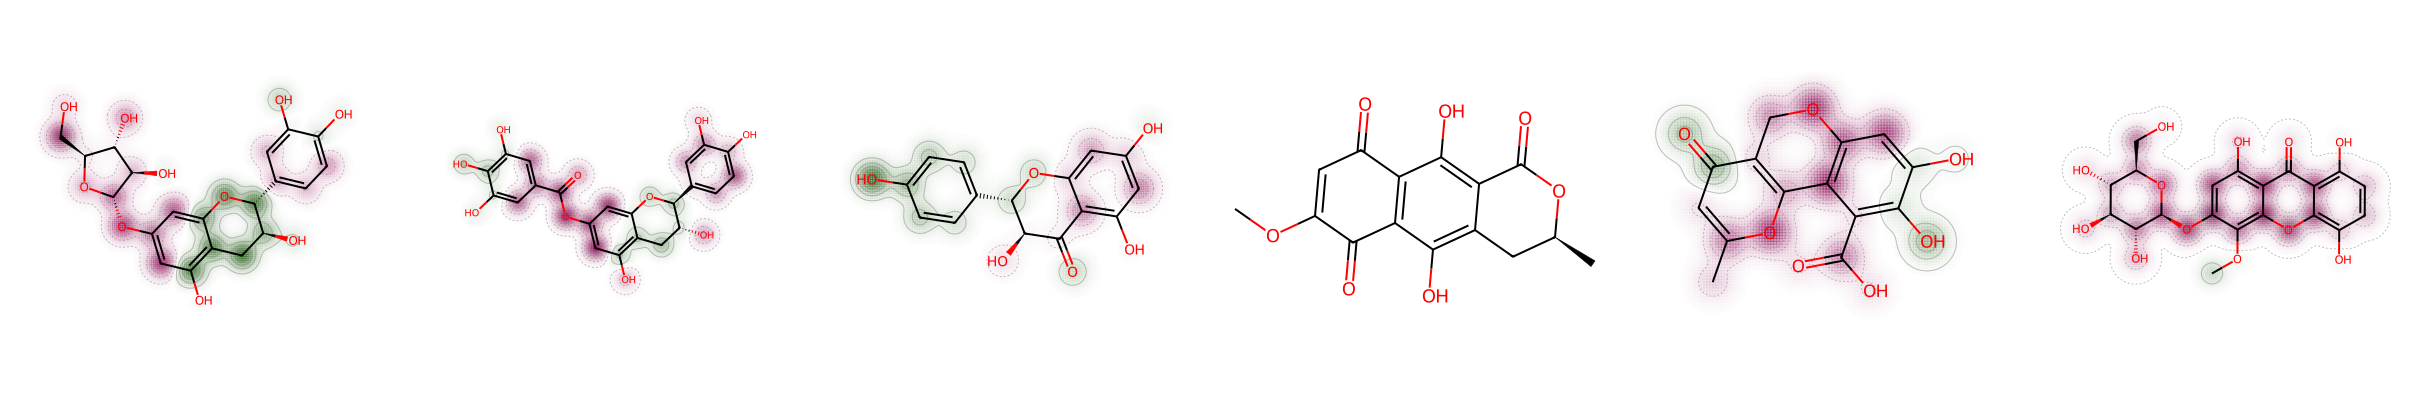

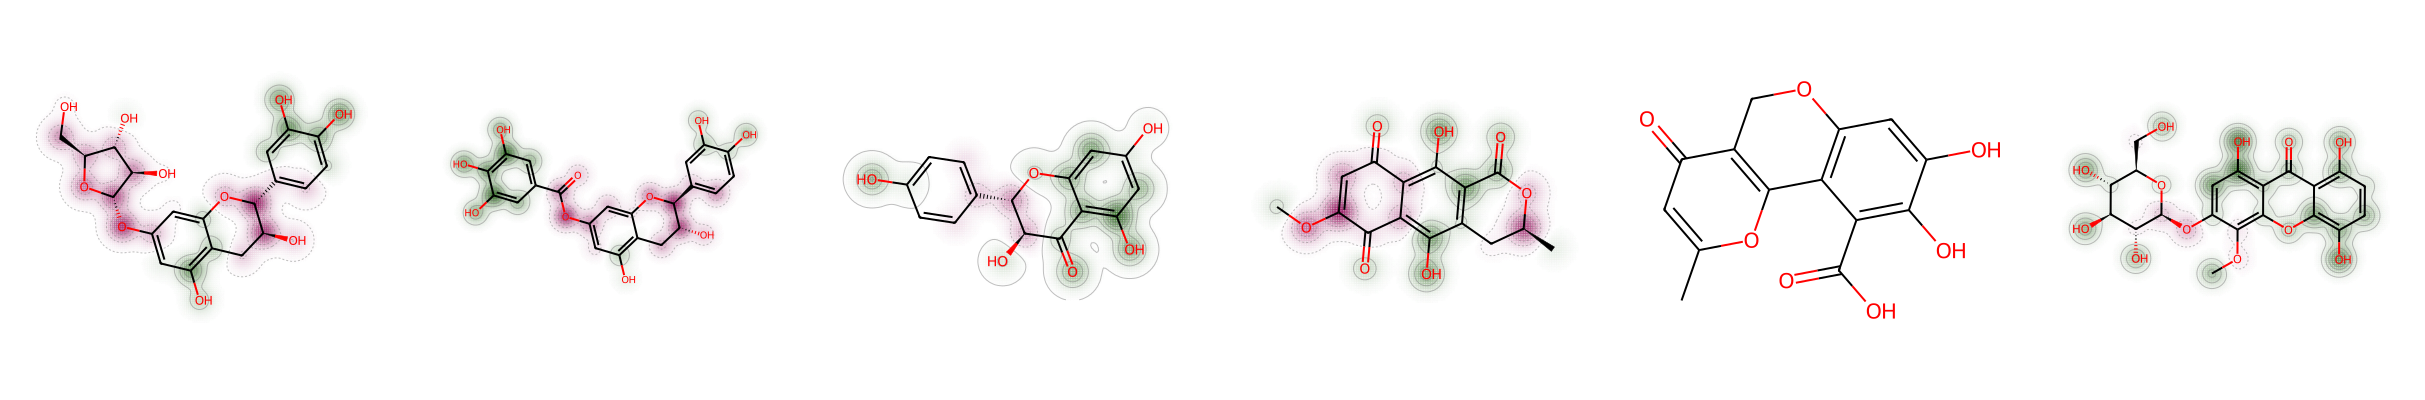

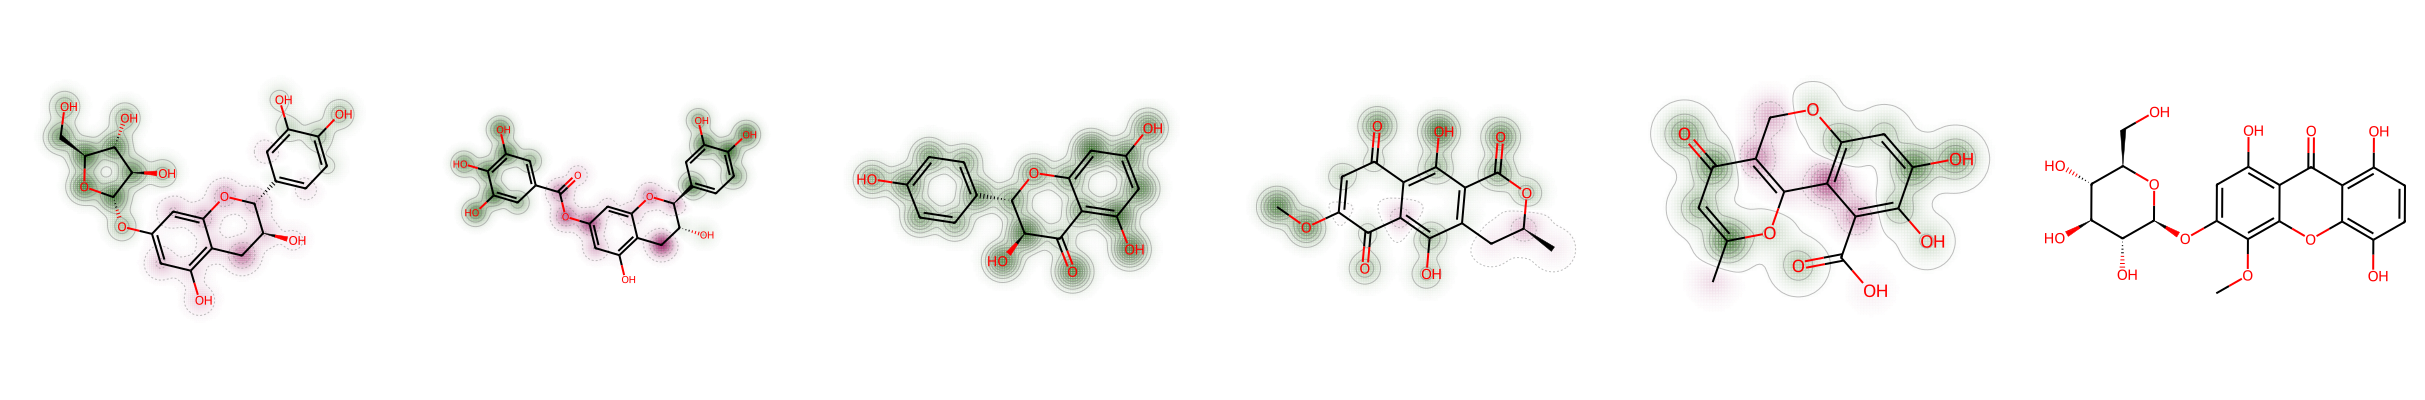

In [244]:
analogue_sim_maps = create_sim_maps(query_analogues, fp_function=MorganWrapper, add_legend=False)

sim_maps_per_mol = (len(query_analogues) - 1)

assert len(analogue_sim_maps) == sim_maps_per_mol * len(query_analogues)

sim_map_id = 0
for mol_id, mol in enumerate(query_analogues):
    vis_list = []
    draw2d = Draw.MolDraw2DCairo(400, 400)
    for sim_id in range(sim_map_id, sim_map_id + sim_maps_per_mol):
        vis_list.append(analogue_sim_maps[sim_id])
    sim_map_id += sim_maps_per_mol
    vis_list.insert(mol_id, draw_mol(draw2d, mol))
    display(draw_images(vis_list))

#### Frags from stacked sim maps

In [245]:
# select indices of stacked_weights[0] where the value is above 0.2
indices = [idx for idx, weight in enumerate(stacked_weights[0]) if weight >= SIM_MAP_THESHOLD]

fragment_atom_ids = []
if indices:
    consecutive_indices = [indices[0]]
    for i in range(1, len(indices)):
        if indices[i] - indices[i-1] == 1:
            consecutive_indices.append(indices[i])
        else:
            fragment_atom_ids.append(consecutive_indices)
            consecutive_indices = [indices[i]]

    if consecutive_indices:
        fragment_atom_ids.append(consecutive_indices)

    print(indices)
    print(fragment_atom_ids)
else:
    print("No indices found.")

[8, 10, 11, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23]
[[8], [10, 11], [13, 14, 15], [17, 18, 19, 20, 21, 22, 23]]


In [246]:
from ms_chemical_space_explorer.fragment_extractor import extract_sim_map_fragments_from_mol
from ms_chemical_space_explorer.chemical_space_visualizer import draw_mol

matched_fragment_higlight_imgs = []
matched_fragments = []
sim_map_fragments = []
unique_smiles = set()
mcs_fragment = Chem.MolFromSmiles("")
for i, analogue in enumerate(query_analogues):
    fragments = extract_sim_map_fragments_from_mol(analogue, stacked_weights[i], SIM_MAP_THESHOLD, fragment_legend=f"{QUERY_SPECTRUM_ID}.{analogue.GetProp('analogue_id')}")
    for fragment in fragments:
        smiles = Chem.MolToSmiles(fragment)
        if smiles in unique_smiles:
            continue
        unique_smiles.add(smiles)
        sim_map_fragments.append(fragment)
        
        if fragment.GetNumAtoms() > mcs_fragment.GetNumAtoms():
            mcs_fragment = fragment
        
        substruct_match = query_mol.GetSubstructMatch(fragment)
        if(len(substruct_match) <= 0):
            continue
        matched_fragments.append(fragment)
        
        d2d = Draw.MolDraw2DCairo(250,200)
        dopts = d2d.drawOptions()
        dopts.setHighlightColour((0,.9,.9,.8))
        matched_fragment_higlight_imgs.append(draw_mol(d2d, query_mol, legend=f"{fragment.GetProp('fragment_id')}", highlight_atoms=substruct_match))

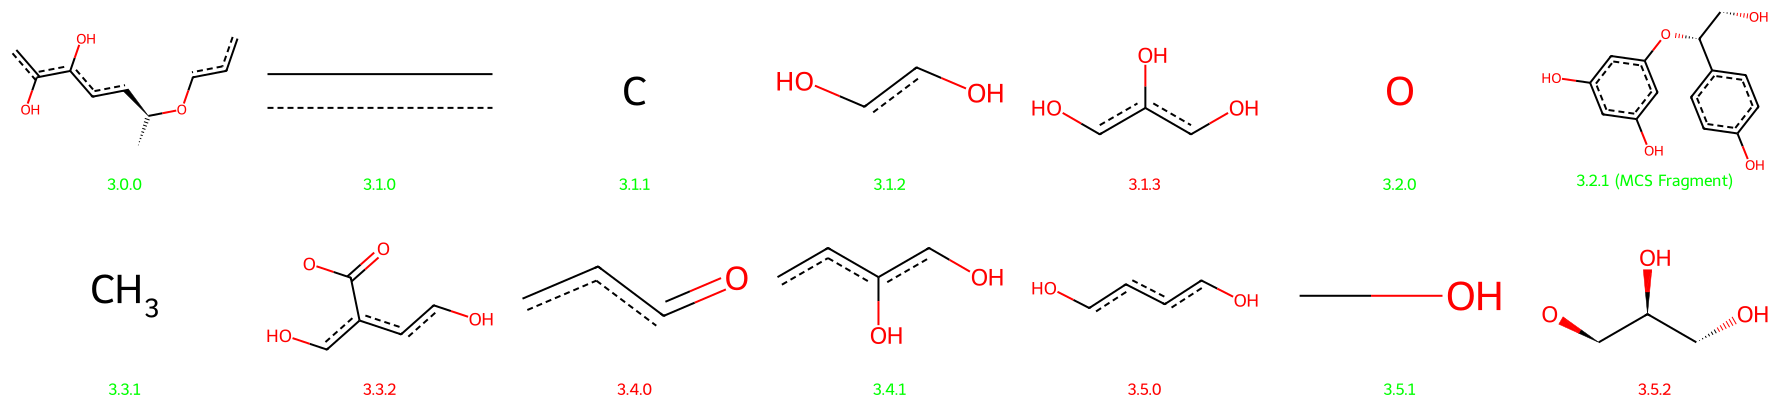

In [247]:
fragment_imgs = []
matched_string = ""
for i, fragment in enumerate(sim_map_fragments):
    d2d = Draw.MolDraw2DCairo(250,200)
    dopts = d2d.drawOptions()

    if matched_fragments.__contains__(fragment):
        dopts.setLegendColour((0, 1, 0))
    else:
        dopts.setLegendColour((1, 0, 0))
    
    if(fragment.GetProp('fragment_id') == mcs_fragment.GetProp('fragment_id')):
        matched_string = " (MCS Fragment)"
    else:
        matched_string = ""
    
    fragment_imgs.append(draw_mol(d2d, fragment, legend=f"{fragment.GetProp('fragment_id')}" + matched_string))
draw_images(fragment_imgs)

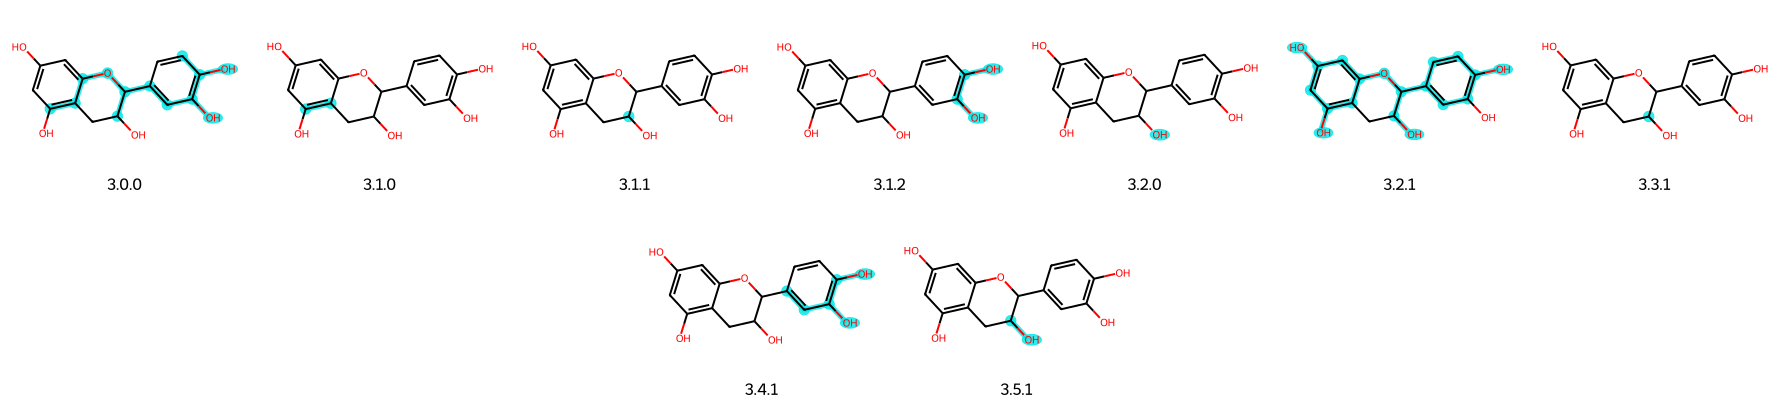

In [248]:
draw_images(matched_fragment_higlight_imgs)

In [249]:
def find_fragment_in_mol(mol, fragment):
    matches = mol.GetSubstructMatches(fragment)
    return len(matches) > 0

num_matching_fragments = 0
sum_atoms_in_matching_fragments = 0
for fragment in sim_map_fragments:
    if(find_fragment_in_mol(query_mol, fragment)):
        sum_atoms_in_matching_fragments += fragment.GetNumAtoms()
        num_matching_fragments += 1

num_fragments = len(sim_map_fragments)
query_size = query_mol.GetNumAtoms()
avg_fragment_size = sum_atoms_in_matching_fragments / num_matching_fragments if num_matching_fragments > 0 else 0
fragment_score = avg_fragment_size / query_size * num_matching_fragments / num_fragments

print(f"Found {num_matching_fragments}/{num_fragments} analogue fragments in the query molecule: {num_matching_fragments/num_fragments*100:.2f}%")
print(f"Average fragment size: {avg_fragment_size:.2f} atoms. Query size: {query_size} atoms: {avg_fragment_size/query_size:.2f}")
print(f"Score: {fragment_score:.2f}")

Found 9/14 analogue fragments in the query molecule: 64.29%
Average fragment size: 5.44 atoms. Query size: 21 atoms: 0.26
Score: 0.17


#### Frags from all sim maps

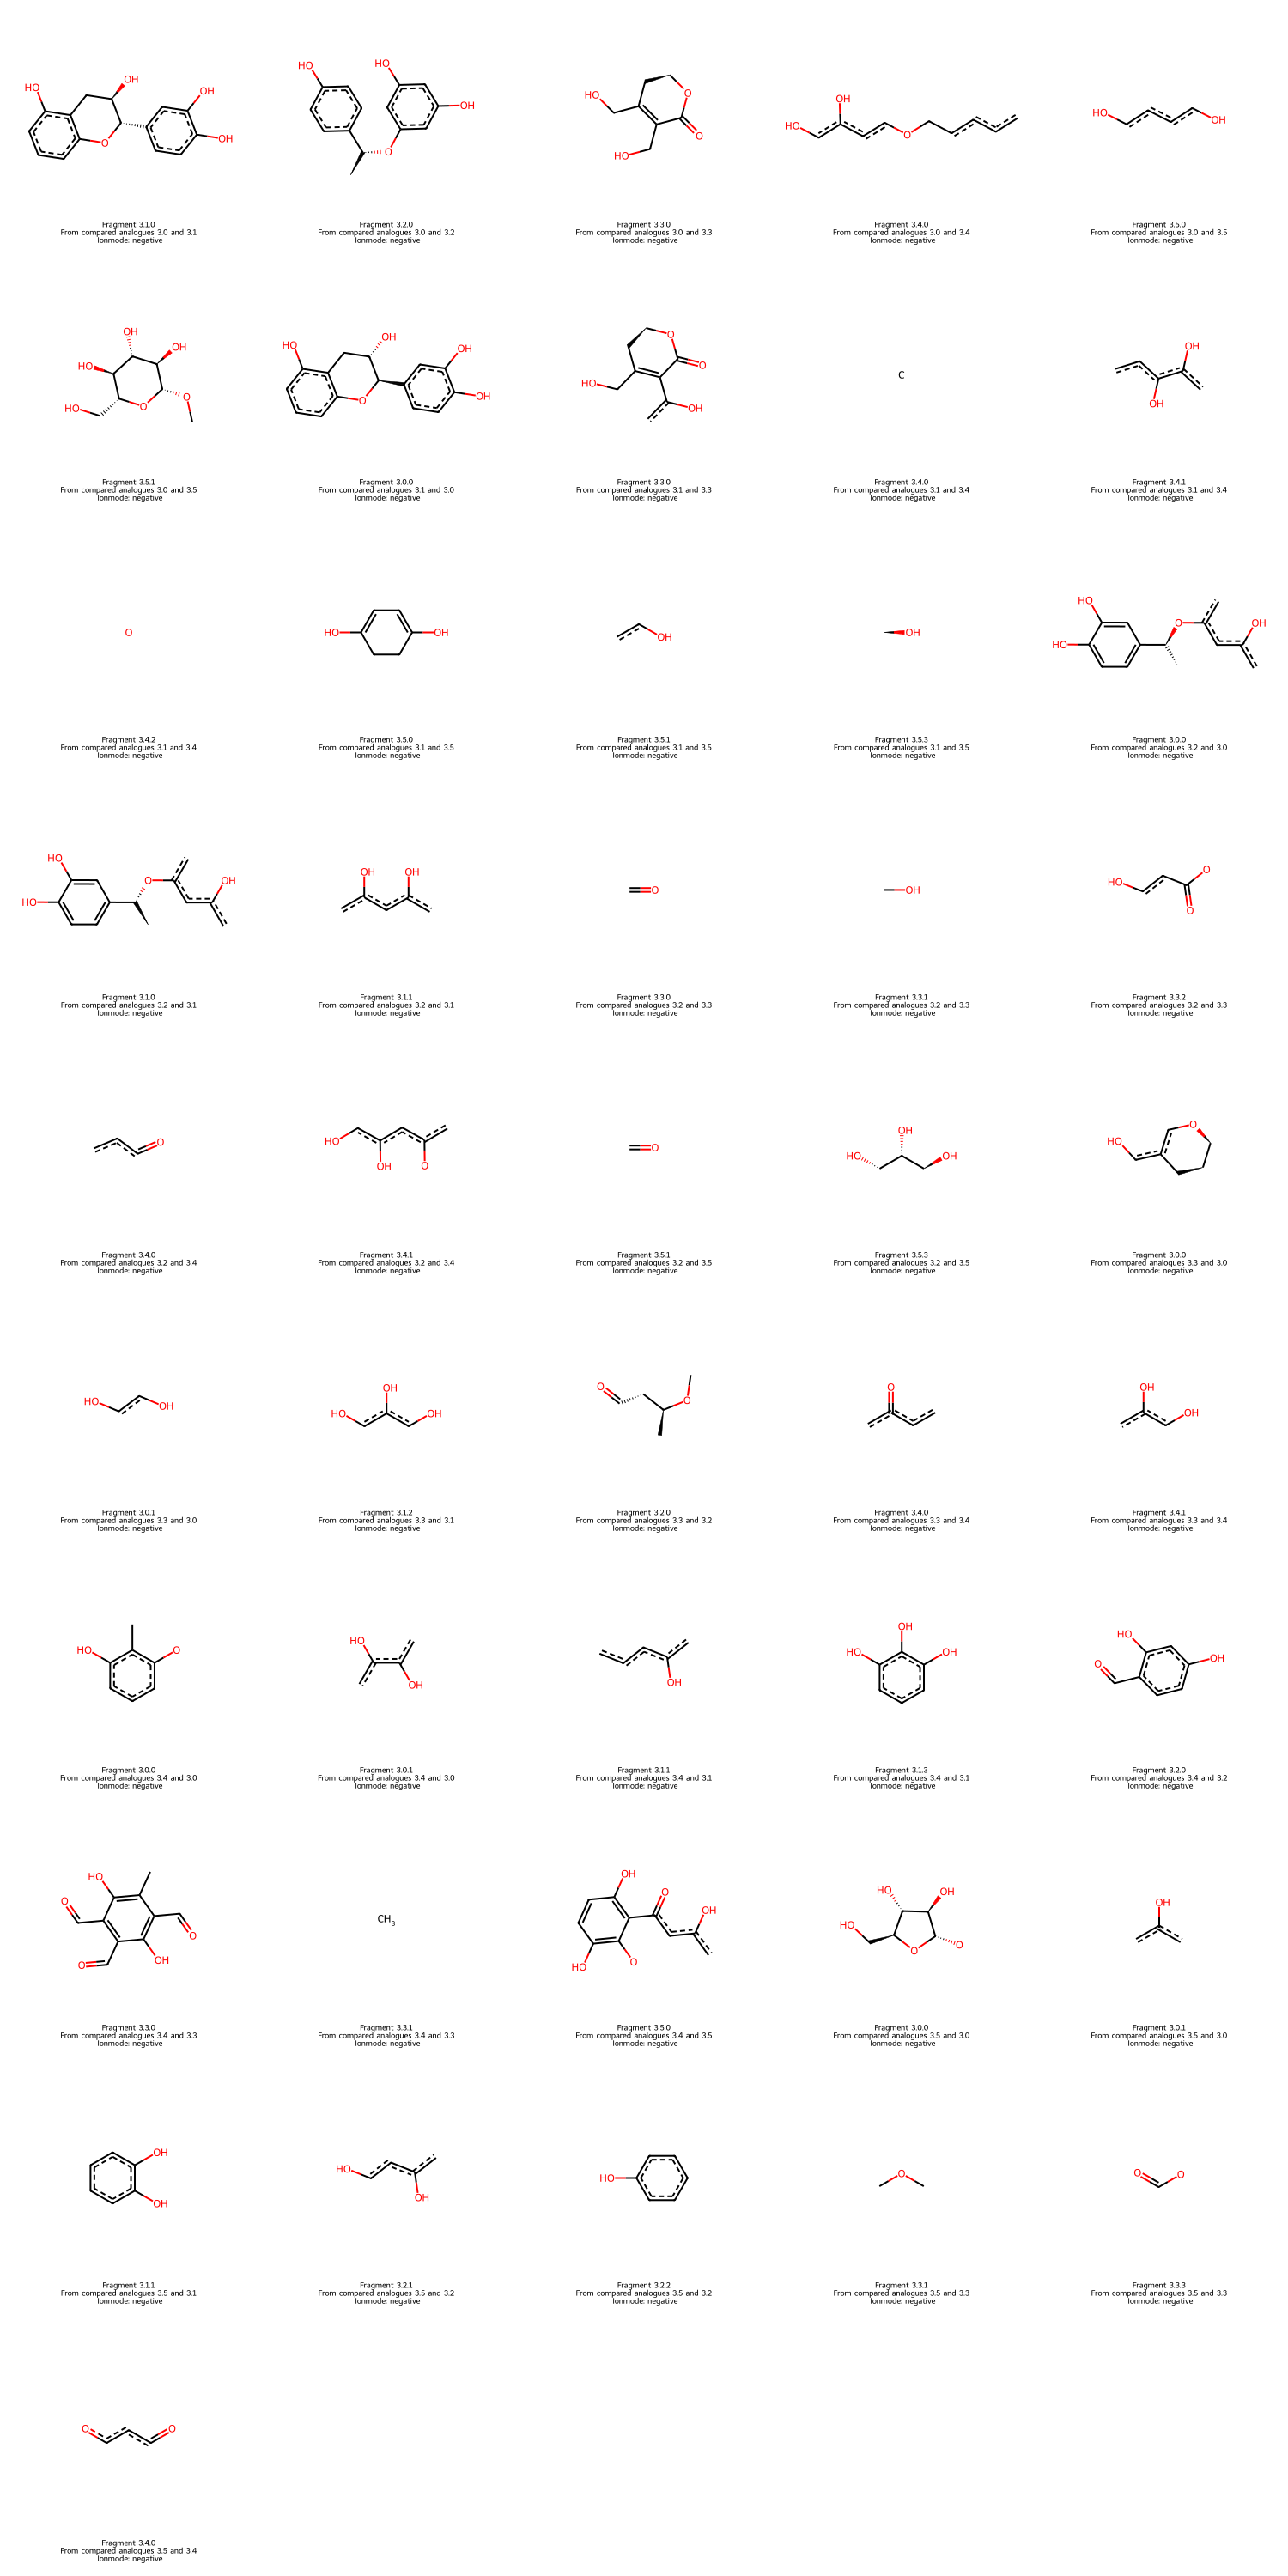

In [250]:
from ms_chemical_space_explorer.fragment_extractor import extract_sim_map_fragments_from_analogues
from ms_chemical_space_explorer.chemical_space_visualizer import visualize_similarity_fragments

fragments = extract_sim_map_fragments_from_analogues(query_analogues, SIM_MAP_THESHOLD, MorganWrapper)
#remove duplicate fragments by comparing smiles
unique_smiles = set()
unique_fragments = []
for fragment in fragments:
    smiles = Chem.MolToSmiles(fragment)
    if smiles not in unique_smiles:
        unique_smiles.add(smiles)
        unique_fragments.append(fragment)
visualize_similarity_fragments(unique_fragments, FRAGMENTS_PER_ROW)

In [251]:
def find_fragment_in_mol(mol, fragment):
    matches = mol.GetSubstructMatches(fragment)
    return len(matches) > 0

num_matching_fragments = 0
sum_atoms_in_matching_fragments = 0
for fragment in unique_fragments:
    if(find_fragment_in_mol(query_mol, fragment)):
        sum_atoms_in_matching_fragments += fragment.GetNumAtoms()
        num_matching_fragments += 1

num_fragments = len(unique_fragments)
query_size = query_mol.GetNumAtoms()
avg_fragment_size = sum_atoms_in_matching_fragments / num_matching_fragments if num_matching_fragments > 0 else 0
fragment_score = avg_fragment_size / query_size * num_matching_fragments / num_fragments

print(f"Found {num_matching_fragments}/{num_fragments} analogue fragments in the query molecule: {num_matching_fragments/num_fragments*100:.2f}%")
print(f"Average fragment size: {avg_fragment_size:.2f} atoms. Query size: {query_size} atoms: {avg_fragment_size/query_size:.2f}")
print(f"Score: {fragment_score:.2f}")

Found 24/46 analogue fragments in the query molecule: 52.17%
Average fragment size: 7.58 atoms. Query size: 21 atoms: 0.36
Score: 0.19


#### What should my SimMap Fragment algorithm acuatually find???

I want to find fragments in the analogues, that are also present in the query spectrum. A stupid way to that, would be just to find all the single C atoms, because there are lots in the analogues and the query atom. I can punish this, by removing all duplicate fragments. This way,
- **the more unique fragments are found, the better!**. 

There is a drawback to removing the duplicates though. If a fragment is occuring multiple times in a single analogue, and just as many times in the query, that might be a clue for similarity. The removing could be countered by counting the occurances and rewarding a similiar count, but that would also bring back the problem with single C atoms: 
- **Multiple fragment occurances in the query mol are disregarded** 
to keep this project from exploding.

As I am not interested in single C atoms, I might also state, that I want to find large fragments. Large could mean a high number of atoms, or a high number of mass. I am unsure what would be better so I am going for the easier solution to reward fragments with a lot of atoms: 
- **The more atoms in a single fragment, the better!** and **Mass of fragments is disregarded!**

After all, the fragments should be contained in the query mol. So this is actually the most important to the score: 
- **Fragments that are no substructure of the query spectrum, are punished!**. 

This could be a good counter balance to the general reward of large atoms and just finding a lot of fragments.


The quality of the fragments found will be scored like this:
```
n = number of fragments occuring in the query
m = average of number of atoms in a fragment
o = number of fragments NOT occuring in the query

s = (n - o) * m
```

To normalize the score, fragment size will be divided through the number of atoms in the query molecule. Fragments that are larger than the query molecule would achieve average fragment size > 1. So only the fragments contained in the substructure will contribute to the average fragment size multiplier. 

```
num_fragments = total number of fragments, that were extracted from the analogues
num_matching_fragments = number of fragments occurring in the query
query_size = number of atoms in the query molecule
avg_fragment_size = average number of atoms in matching fragments
fragment_score = avgFragmentSize / query size * num_matching_fragments / num_fragments
```


In [252]:
from ms_chemical_space_explorer.fragment_extractor import extract_sim_map_fragments_from_analogues
from ms_chemical_space_explorer.chemical_space_visualizer import visualize_similarity_fragments

def calculate_fragment_score(query_mol, fragments, debug=False):
    unique_smiles = set()
    unique_fragments = []
    for fragment in fragments:
        smiles = Chem.MolToSmiles(fragment)
        if smiles not in unique_smiles:
            unique_smiles.add(smiles)
            unique_fragments.append(fragment)
    
    num_matching_fragments = 0
    sum_atoms_in_matching_fragments = 0
    for fragment in unique_fragments:
        if(len(query_mol.GetSubstructMatches(fragment)) > 0):
            sum_atoms_in_matching_fragments += fragment.GetNumAtoms()
            num_matching_fragments += 1

    num_fragments = len(unique_fragments)
    query_size = query_mol.GetNumAtoms()
    avg_fragment_size = sum_atoms_in_matching_fragments / num_matching_fragments if num_matching_fragments > 0 else 0
    fragment_score = avg_fragment_size / query_size * num_matching_fragments / num_fragments

    if(debug):
        print(f"Found {num_matching_fragments}/{num_fragments} analogue fragments in the query molecule: {num_matching_fragments/num_fragments*100:.2f}%")
        print(f"Average fragment size: {avg_fragment_size:.2f} atoms. Query size: {query_size} atoms: {avg_fragment_size/query_size:.2f}")
        print(f"Score: {fragment_score:.3f}")
    return fragment_score

In [253]:
from ms_chemical_space_explorer.fragment_extractor import generate_mols_from_spectrum_query

query_mol = Chem.MolFromSmiles(query_spectra[QUERY_SPECTRUM_ID].metadata["smiles"])
query_analogues_df = all_analogues[all_analogues["query_spectrum_id"] == QUERY_SPECTRUM_ID]
query_analogues = generate_mols_from_spectrum_query(spectrum_query_result=query_analogues_df)

fragments = extract_sim_map_fragments_from_analogues(query_analogues, 0.9, MorganWrapper,)
calculate_fragment_score(query_mol, fragments,  debug=True)

Found 8/8 analogue fragments in the query molecule: 100.00%
Average fragment size: 1.75 atoms. Query size: 21 atoms: 0.08
Score: 0.083


0.08333333333333333

## FMCS

In [254]:
from rdkit import Chem
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

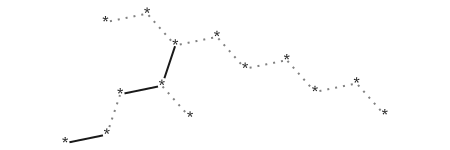

In [272]:
params = rdFMCS.MCSParameters()
# params.AtomTyper = rdFMCS.AtomCompare.CompareElements
# params.BondTyper = rdFMCS.BondCompare.CompareOrder

mcs = rdFMCS.FindMCS(query_analogues, params)
mcs.queryMol

In [276]:
matched_fragment_higlight_imgs = []
for i, mol in enumerate(query_analogues):
    d2d = Draw.MolDraw2DCairo(250,200)
    matched_fragment_higlight_imgs.append(draw_mol(d2d, mol, legend=f'Analogue {i}',highlight_atoms=mol.GetSubstructMatch(mcs.queryMol)))

draw_images(matched_fragment_higlight_imgs)

ArgumentError: Python argument types in
    MolDraw2D.DrawMoleculeWithHighlights(MolDraw2DCairo, Mol)
did not match C++ signature:
    DrawMoleculeWithHighlights(class RDKit::MolDraw2D {lvalue} self, class RDKit::ROMol mol, class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> > legend, class boost::python::api::object highlight_atom_map, class boost::python::api::object highlight_bond_map, class boost::python::api::object highlight_radii, class boost::python::api::object highlight_linewidth_multipliers, int confId=-1)

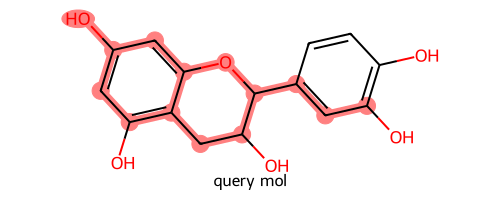

In [ ]:
d2d = Draw.MolDraw2DCairo(500,200)
draw_mol(d2d, query_mol, legend='query mol',highlight_atoms=query_mol.GetSubstructMatch(mcs.queryMol))

In [ ]:
query_mol.GetSubstructMatch(mcs.queryMol)

(2, 3, 1, 4, 10, 12, 6, 9, 11, 13, 7, 14, 8, 15)

In [ ]:
query_mol.GetSubstructMatches(mcs.queryMol)

((2, 3, 1, 4, 10, 12, 6, 9, 11, 13, 7, 14, 8, 15),
 (2, 3, 1, 4, 10, 12, 6, 9, 11, 13, 7, 20, 8, 19),
 (2, 3, 1, 10, 4, 12, 9, 6, 5, 13, 7, 14, 8, 15),
 (2, 3, 1, 10, 4, 12, 9, 6, 5, 13, 7, 20, 8, 19))

In [ ]:
from PIL import Image
from io import BytesIO

def str_to_image(byte_data: str) -> Image.Image:
    bio = BytesIO(byte_data)
    return Image.open(bio)


def draw_mol(draw2d: Draw.MolDraw2D, mol: Chem.Mol, legend: str = "", highlight_atoms=None) -> Image.Image:
    """
    Draw a molecule with optional highlighting of atom groups.
    
    Parameters:
    - draw2d: RDKit MolDraw2D object
    - mol: RDKit molecule
    - legend: Optional text legend
    - highlight_atoms: Can be:
      - A list/tuple of atom indices for a single group
      - A list/tuple of lists/tuples for multiple groups (e.g., from GetSubstructMatches)
      - None for no highlighting
    
    Returns:
    - PIL Image of the drawn molecule
    """
    if highlight_atoms:
        # Define highlight colors - bright, distinguishable colors
        colors = [(1.0, 0.0, 0.0), (0.0, 1.0, 0.0), (0.0, 0.0, 1.0), 
                 (1.0, 1.0, 0.0), (1.0, 0.0, 1.0), (0.0, 1.0, 1.0)]
        
        # Prepare highlight_atom_map dictionary
        highlight_atom_map = {}
        
        # Check if highlight_atoms is a list of atom groups
        if len(highlight_atoms) > 0 and isinstance(highlight_atoms[0], (list, tuple)):
            # Multiple groups from GetSubstructMatches
            for i, atom_group in enumerate(highlight_atoms):
                color = colors[i % len(colors)]  # Cycle through colors
                for atom_id in atom_group:
                    highlight_atom_map[atom_id] = color
        else:
            # Single group of atoms
            for atom_id in highlight_atoms:
                highlight_atom_map[atom_id] = colors[0]  # Use the first color
                
        # Draw with highlights
        draw2d.DrawMoleculeWithHighlights(mol, legend=legend, 
                                         highlight_atom_map=highlight_atom_map, 
                                         highlight_bond_map=None, 
                                         highlight_radii=None)
    else:
        # No highlighting
        draw2d.DrawMolecule(mol, legend=legend)
    
    draw2d.FinishDrawing()
    return str_to_image(draw2d.GetDrawingText())

#draw_mol(d2d, query_mol, legend='Query Mol',highlight_atoms=query_mol.GetSubstructMatches(mcs.queryMol))

## BitVector Fragments

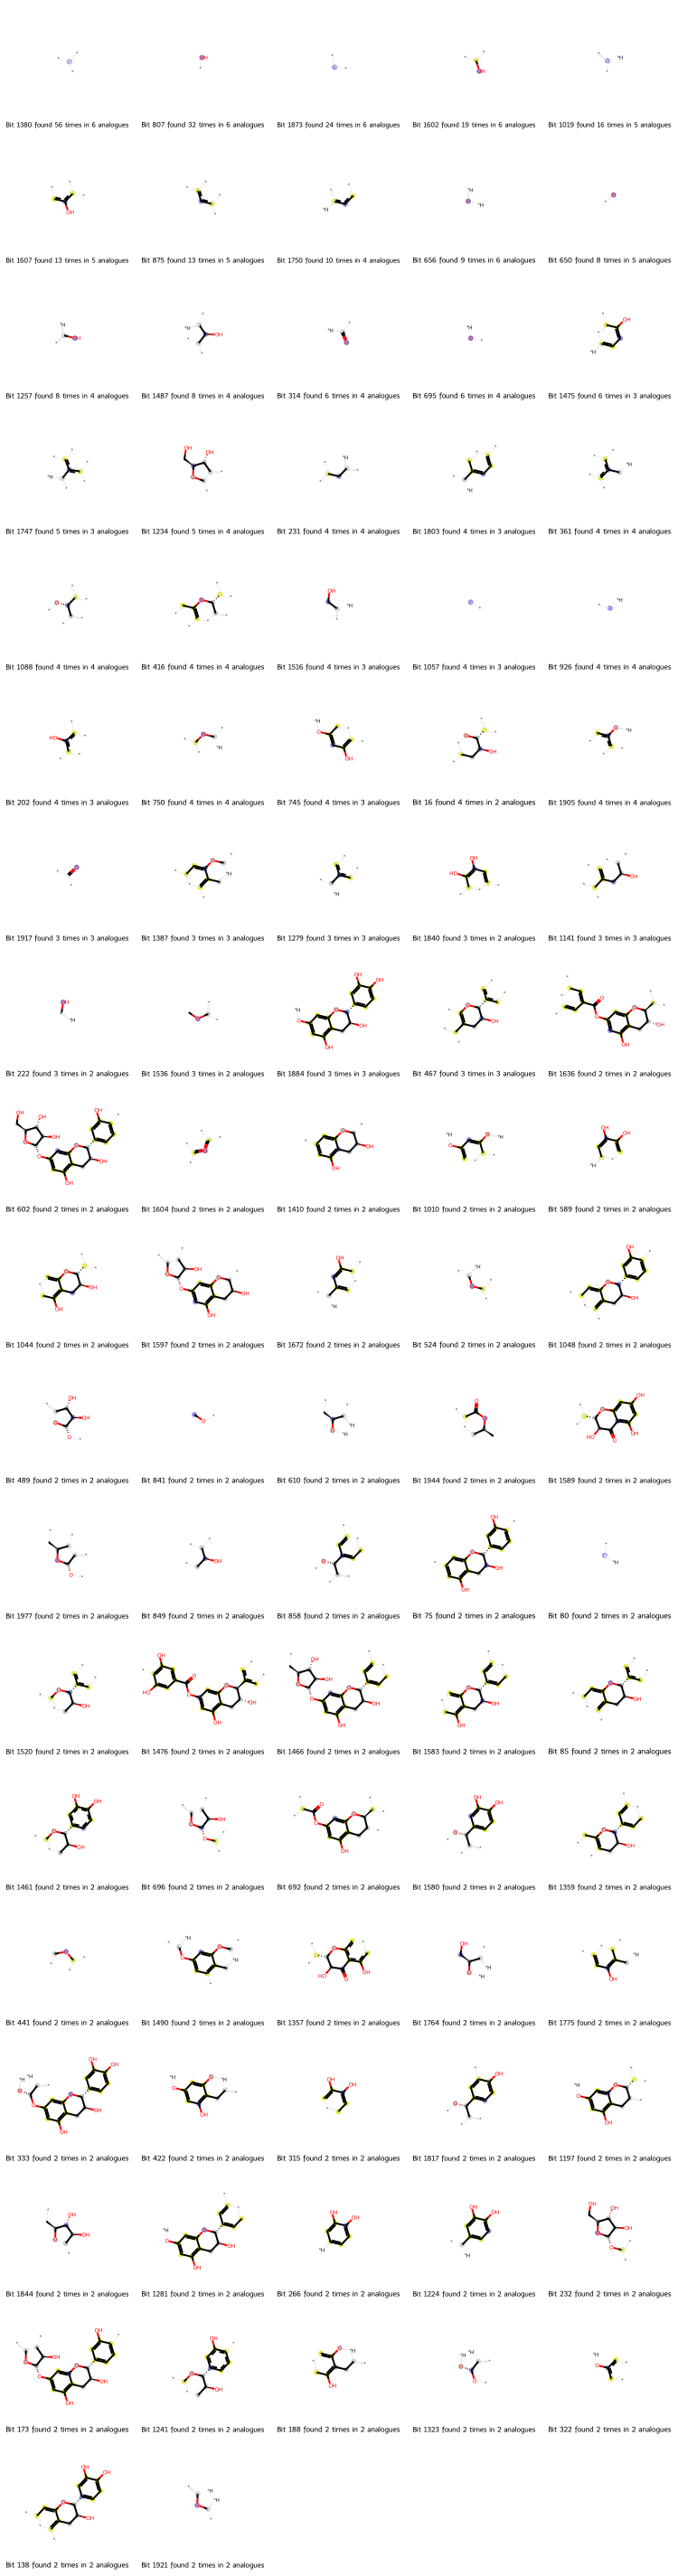

In [ ]:
from ms_chemical_space_explorer.fragment_extractor import extract_bitvector_fragments_from_analogues

extract_bitvector_fragments_from_analogues(query_analogues, MORGAN_RADIUS, fragments_per_row=FRAGMENTS_PER_ROW, count_threshold=0)

## Spectra Plotting

#### old

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def parse_mgf_spectrum(file_path, spectrum_index=0):
    """Parse a single spectrum from an MGF file.
    
    Args:
        file_path (str): Path to the MGF file
        spectrum_index (int): Index of the spectrum to parse (0-based)
    
    Returns:
        tuple: (metadata dict, m/z array, intensity array)
    """
    with open(file_path, 'r') as f:
        mgf_text = f.read()
    
    spectra = mgf_text.split('BEGIN IONS')
    if spectrum_index + 1 >= len(spectra):
        raise ValueError(f"Spectrum index {spectrum_index} not found. File contains {len(spectra)-1} spectra.")
        
    spectrum_text = spectra[spectrum_index + 1].split('END IONS')[0]
    
    # Extract metadata and peaks
    metadata = {}
    peaks_mz = []
    peaks_intensity = []
    
    for line in spectrum_text.split('\n'):
        line = line.strip()
        if not line:
            continue
            
        if '=' in line:
            key, value = line.split('=', 1)
            metadata[key] = value
        elif line[0].isdigit():
            try:
                mz, intensity = map(float, line.split())
                peaks_mz.append(mz)
                peaks_intensity.append(intensity)
            except ValueError:
                continue  # Skip lines that can't be parsed as peaks
            
    return metadata, np.array(peaks_mz), np.array(peaks_intensity)

def plot_spectrum(mz, intensity, metadata, title=None):
    """Create a mass spectrum plot.
    
    Args:
        mz (array): m/z values
        intensity (array): intensity values
        metadata (dict): spectrum metadata
        title (str, optional): custom title for the plot
    """
    plt.figure(figsize=(12, 6))
    
    # Create stem plot for the spectrum
    markerline, stemlines, baseline = plt.stem(
        mz, 
        intensity,
        use_line_collection=True
    )
    plt.setp(markerline, 'markerfacecolor', 'navy')
    plt.setp(stemlines, 'color', 'navy')
    plt.setp(baseline, 'color', 'gray')
    
    # Set labels and title
    plt.xlabel('m/z')
    plt.ylabel('Relative Intensity')
    if title:
        plt.title(title)
    else:
        compound_name = metadata.get('COMPOUND_NAME', 'Unknown Compound')
        precursor_mz = metadata.get('PRECURSOR_MZ', 'N/A')
        formula = metadata.get('FORMULA', '')
        title_text = f'{compound_name}\nPrecursor m/z: {precursor_mz}'
        if formula:
            title_text += f'\nFormula: {formula}'
        plt.title(title_text)
    
    # Add grid
    plt.grid(True, alpha=0.3)
    
    # Adjust layout
    plt.tight_layout()
    
    return plt.gcf()

C:\Users\kevin\AppData\Local\Temp\ipykernel_20568\1890212904.py:58: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemlines, baseline = plt.stem(


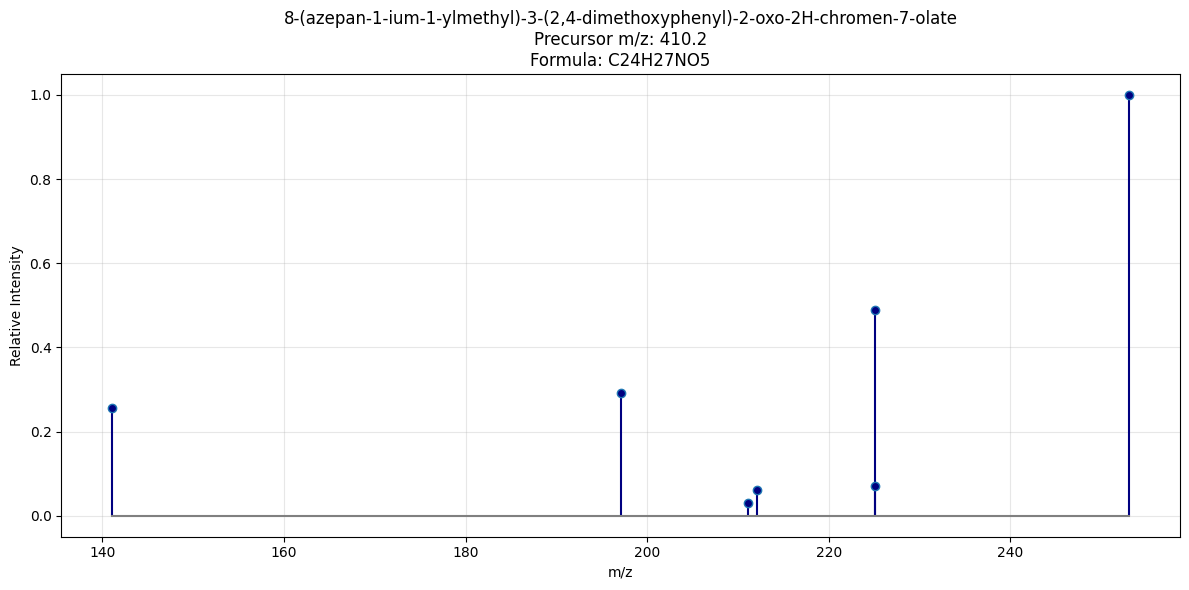


Spectrum Metadata:
Compound: 8-(azepan-1-ium-1-ylmethyl)-3-(2,4-dimethoxyphenyl)-2-oxo-2H-chromen-7-olate
Formula: C24H27NO5
Precursor m/z: 410.2
Adduct: [M+H]+


In [ ]:
spectrum_index = 600

# Parse and plot spectrum
metadata, mz, intensity = parse_mgf_spectrum(FILENAME, spectrum_index=spectrum_index)
plot_spectrum(mz, intensity, metadata)
plt.show()

# Print some metadata
print("\nSpectrum Metadata:")
print(f"Compound: {metadata.get('COMPOUND_NAME', 'Unknown')}")
print(f"Formula: {metadata.get('FORMULA', 'Not specified')}")
print(f"Precursor m/z: {metadata.get('PRECURSOR_MZ', 'Not specified')}")
print(f"Adduct: {metadata.get('ADDUCT', 'Not specified')}")

#### matchMS

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matchms.plotting.spectrum_plots import plot_spectra_mirror
from matplotlib.lines import Line2D

def plot_spectra_multi_mirror(reference, spectra, figsize=(10, 7), cmap='tab10'):
    """
    Plot a reference spectrum against multiple comparison spectra with transparent background.
    
    Parameters:
    -----------
    reference : matchms.Spectrum
        The reference spectrum to compare against
    spectra : list of matchms.Spectrum
        List of spectra to compare with the reference
    figsize : tuple, default=(10, 7)
        Figure size
    cmap : str, default='tab10'
        Matplotlib colormap to use for the spectra colors
        
    Returns:
    --------
    fig, ax : matplotlib figure and axes objects
    """

    # Create a single figure and axes
    fig, ax = plt.subplots(figsize=figsize)
    fig.patch.set_alpha(0.0)
    ax.patch.set_alpha(0.0)
    
    # Get colormap and generate colors for all spectra (reference + comparison)
    colormap = cm.get_cmap(cmap)
    all_colors = [colormap(i / (len(spectra))) for i in range(len(spectra) + 1)]
    
    # First color for reference, rest for comparison spectra
    ref_color = all_colors[0]
    comp_colors = all_colors[1:]
    
    # Calculate alpha values - decreasing for each additional spectrum
    alphas = [1.0 - (i * (0.6 / max(1, len(spectra) - 1))) for i in range(len(spectra))]
    
    # Plot each comparison
    for i, (spectrum, color, alpha) in enumerate(zip(spectra, comp_colors, alphas)):
        plot_spectra_mirror(reference, spectrum, ax=ax, 
                           color_top=ref_color, color_bottom=color, 
                           **{"alpha": alpha})
    
    # Make text backgrounds transparent
    for text in ax.texts:
        text.set_backgroundcolor('none')
    
    # Create custom legend with correct spectrum labels
    legend_elements = [Line2D([0], [0], color=ref_color, lw=2, 
                             label=reference.metadata.get("compound_name", f"Reference"))]
    
    for i, (spectrum, color, alpha) in enumerate(zip(spectra, comp_colors, alphas)):
        name = spectrum.metadata.get("compound_name", f"Spectrum {i+1}")
        legend_elements.append(Line2D([0], [0], color=color, lw=2, alpha=alpha, label=name))
    
    ax.legend(handles=legend_elements, loc='upper right')
    
    return fig, ax

C:\Users\kevin\AppData\Local\Temp\ipykernel_20568\3813411350.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap(cmap)


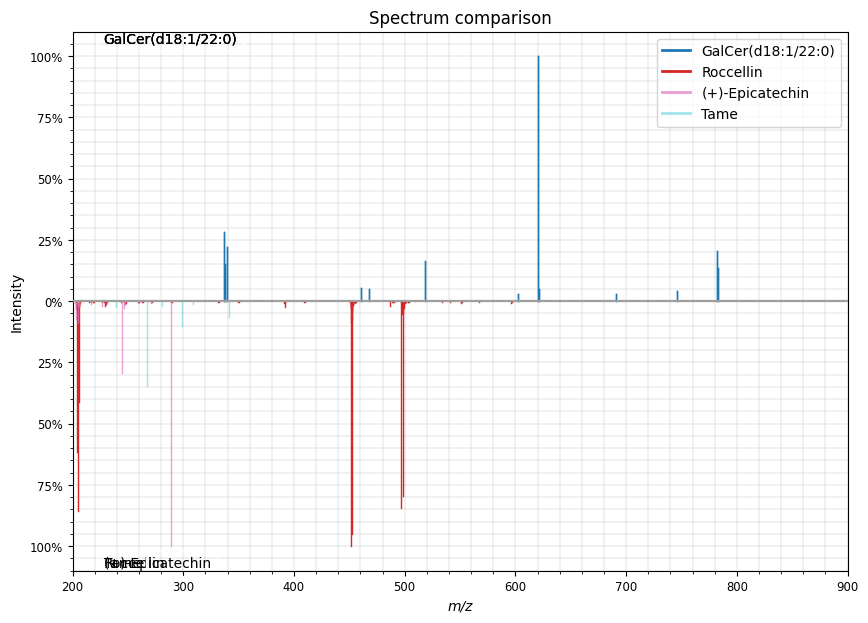

In [ ]:
spectra = [query_spectra[2], query_spectra[3], query_spectra[5]]
fig, ax = plot_spectra_multi_mirror(query_spectra[0], spectra )

# # Save the figure
# plt.savefig('combined_spectra.png', transparent=True, dpi=300)

In [ ]:
import matplotlib.pyplot as plt

def set_transparent(fig, ax):
    # Set transparent background for both figure and axes
    fig.patch.set_alpha(0.0)  # Make figure background transparent
    ax.patch.set_alpha(0.0)   # Make axes background transparent

    # Make text label backgrounds transparent
    for text in ax.texts:
        text.set_backgroundcolor('none')

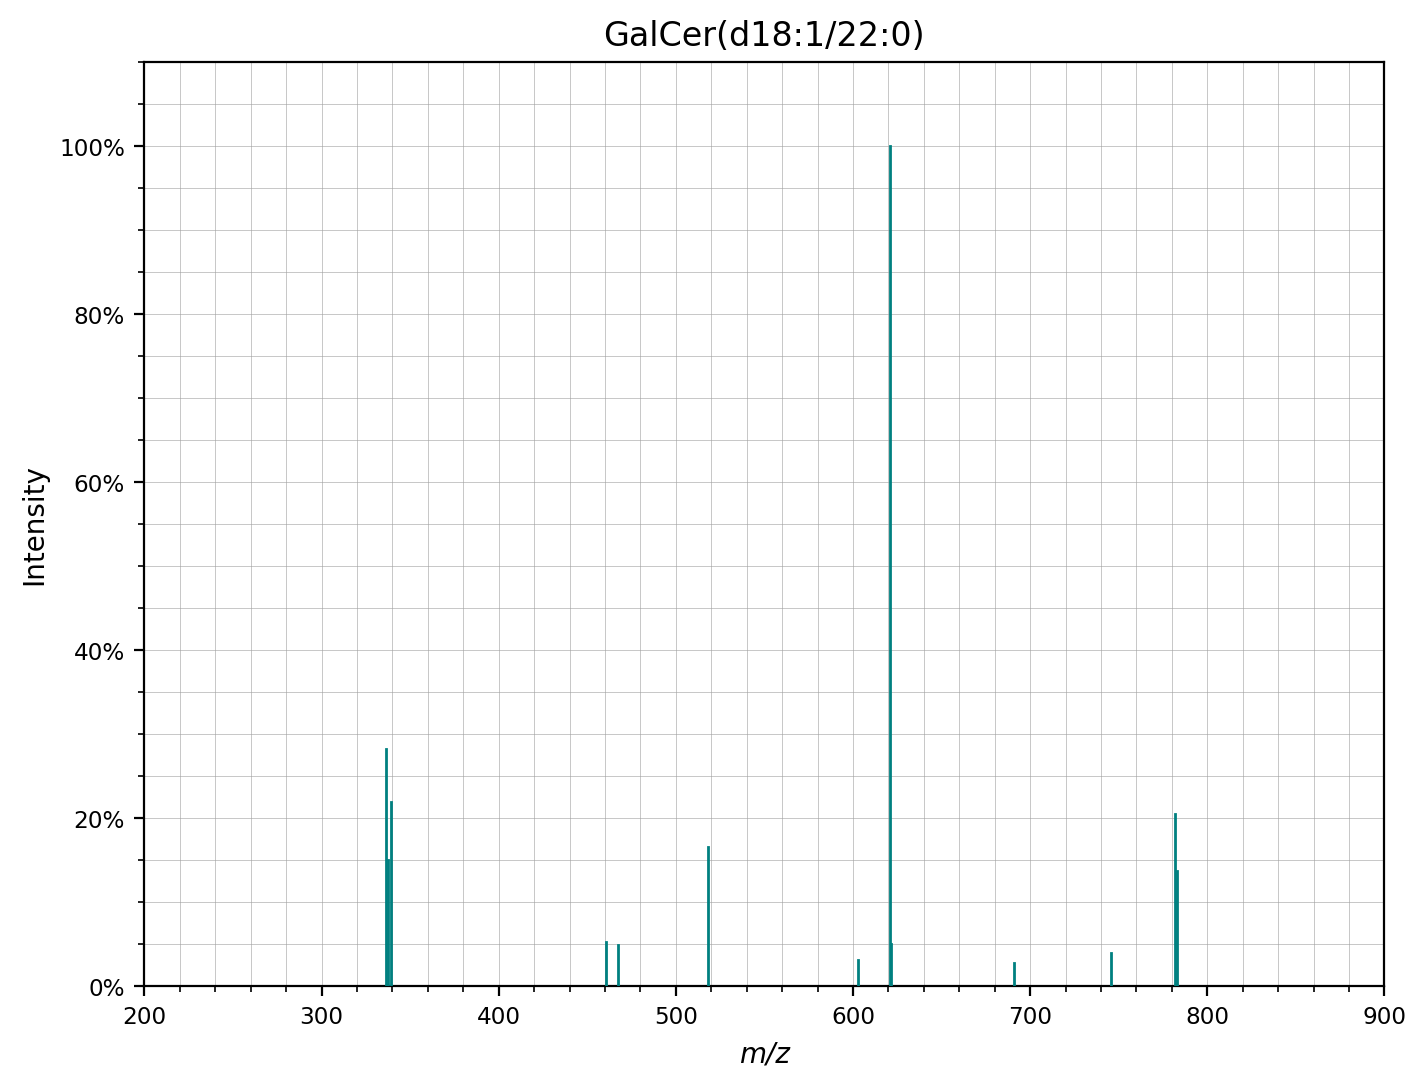

In [ ]:
fig, ax = query_spectra[0].plot()
set_transparent(fig, ax)	
plt.show()

#### SpectraUtils

matchMS useds spectraUtils code. Might as well use the [original](https://spectrum-utils.readthedocs.io/en/latest/plotting.html) with all the extra functionality including interactive plots.